In [19]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [20]:
# Loading the dataset
df = pd.read_csv('heart.csv')

FileNotFoundError: [Errno 2] No such file or directory: '../data/heart.csv'

In [ ]:
# Converting categorical variables to dummy variables
df = pd.get_dummies(df, columns=['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])

In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(['HeartDisease'], axis=1), df['HeartDisease'], test_size=0.2, random_state=42)

In [ ]:
# Creating and training the models
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVC(kernel='linear', random_state=42)

In [ ]:
# Predicting with the trained models
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)
lr_pred = lr.predict(X_test)
knn_pred = knn.predict(X_test)
svm_pred = svm.predict(X_test)

In [ ]:
# Evaluating the models
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print("KNN Accuracy:", accuracy_score(y_test, knn_pred))
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))

Decision Tree Accuracy: 0.8043478260869565
Random Forest Accuracy: 0.8804347826086957
Logistic Regression Accuracy: 0.8532608695652174
KNN Accuracy: 0.7065217391304348
SVM Accuracy: 0.8532608695652174


Sample features for Decision Tree:
     Age  RestingBP  Cholesterol  MaxHR  Oldpeak  Sex_F  Sex_M  \
213   56        130          219    164      0.0      1      0   
866   44        130          219    188      0.0      0      1   
363   56        120            0    148      0.0      0      1   
634   40        140          199    178      1.4      0      1   
136   43        120          215    175      0.0      1      0   
593   64        130          258    130      0.0      0      1   
824   37        130          250    187      3.5      0      1   
192   48        130          245    160      0.0      0      1   
54    52        130          180    140      1.5      1      0   
319   68        145            0    136      1.8      0      1   

     ChestPainType_ASY  ChestPainType_ATA  ChestPainType_NAP  ...  \
213                  0                  0                  1  ...   
866                  0                  1                  0  ...   
363                  1         

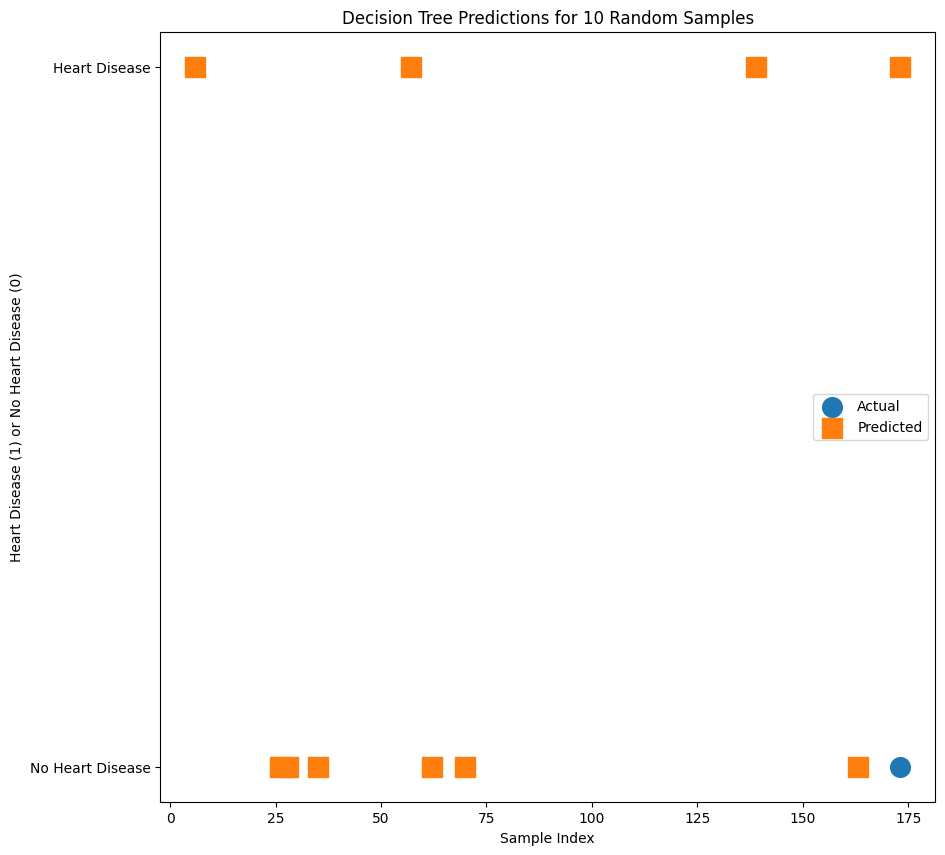

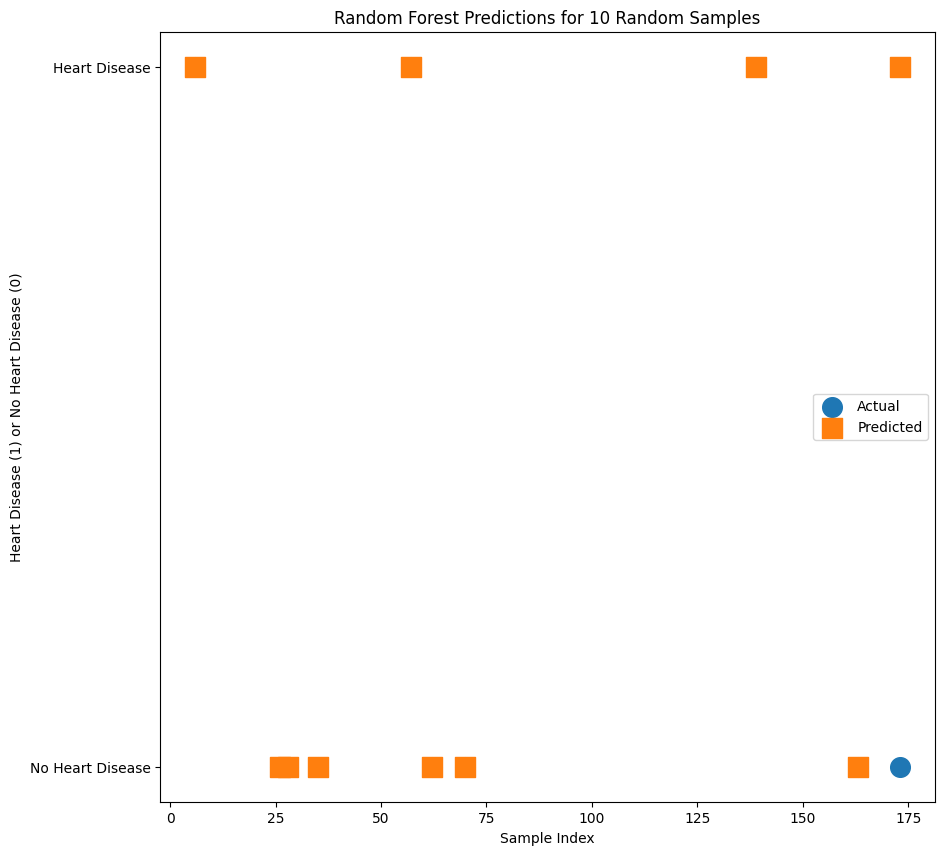

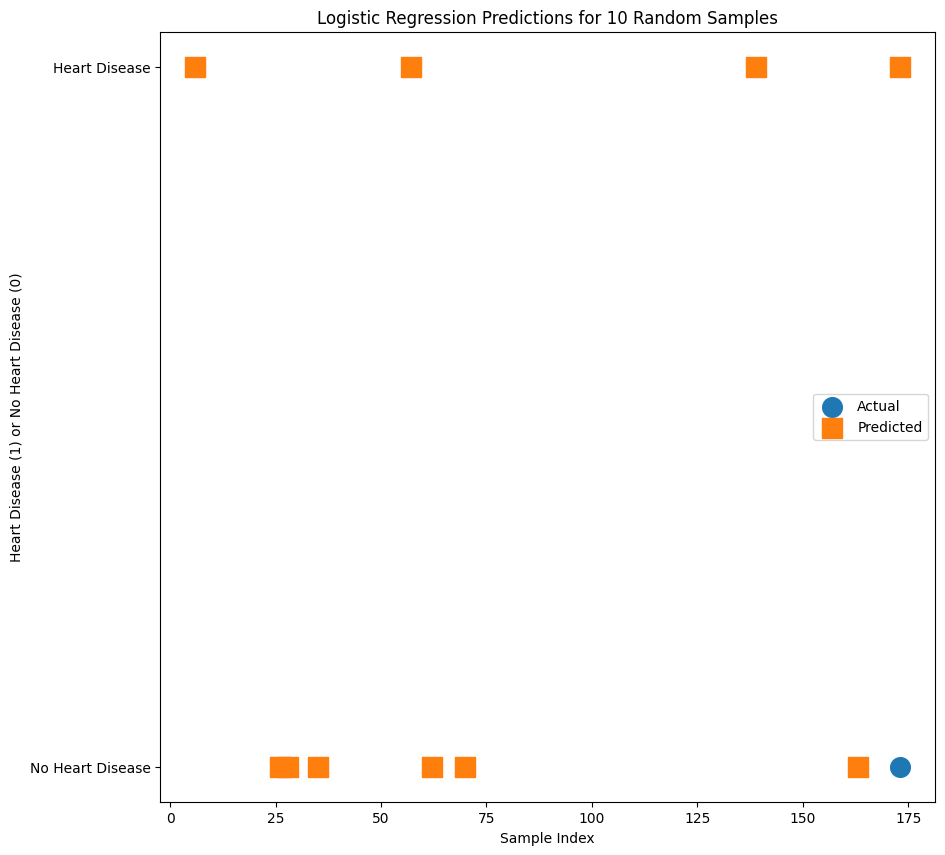

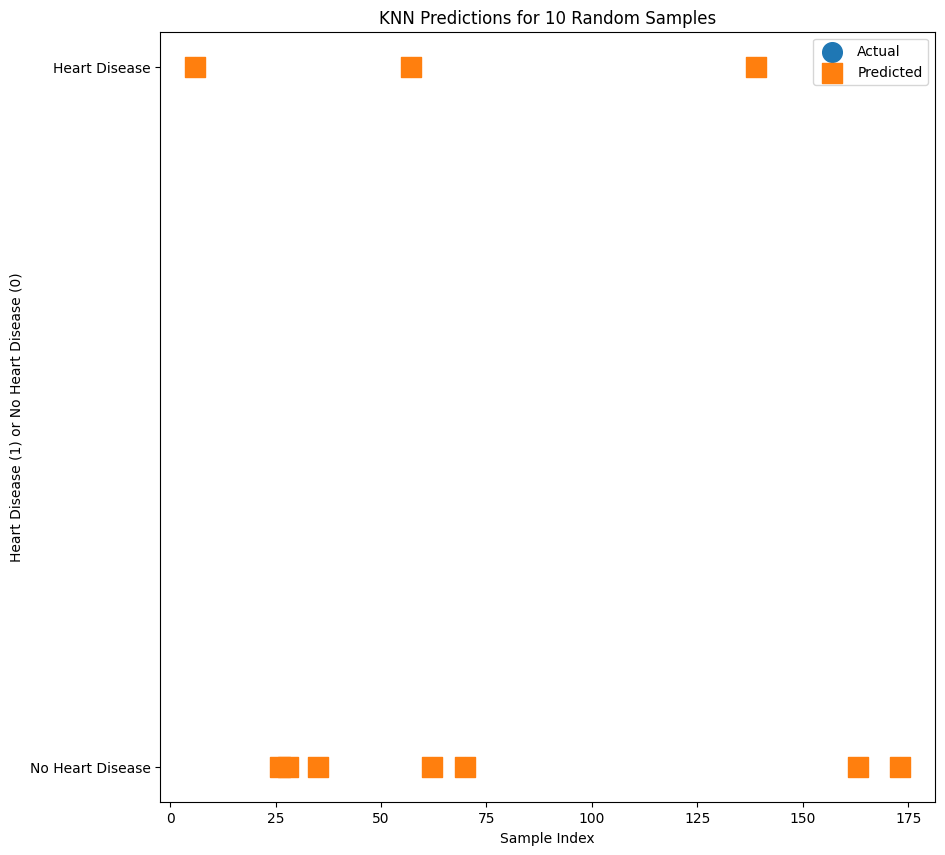

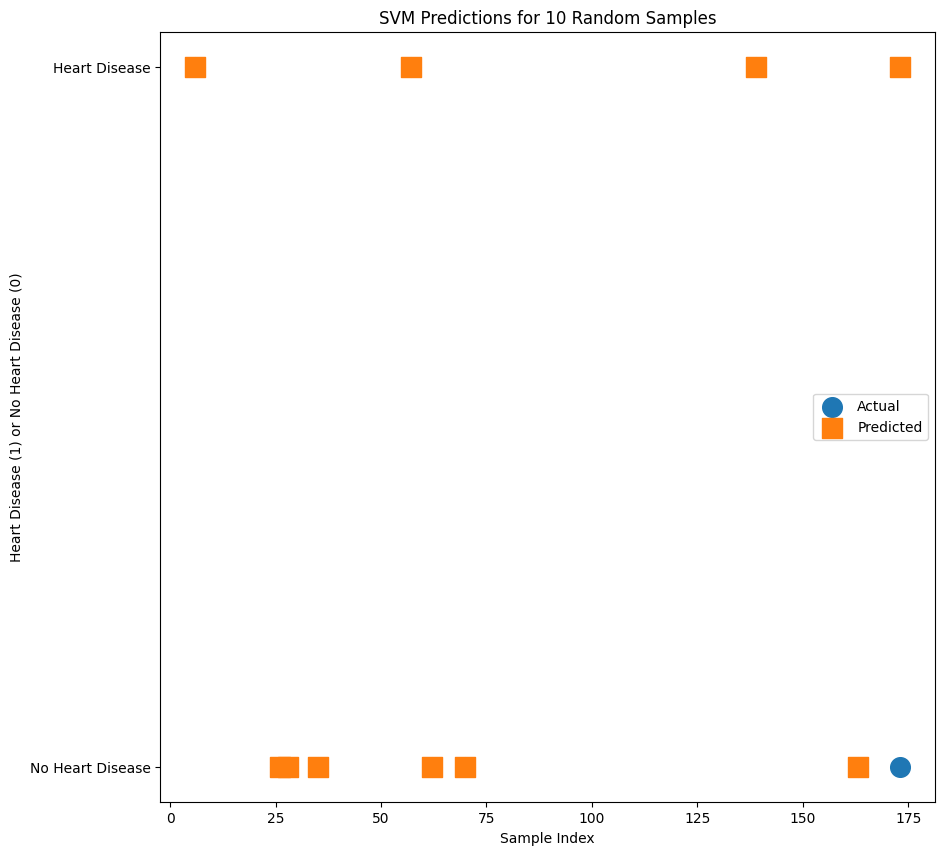

In [ ]:
import random
import matplotlib.pyplot as plt

# Define function to predict on random samples and create chart
def predict_and_chart(model, model_name):
    # Predict on 10 random samples
    random.seed(42)
    sample_indices = random.sample(range(len(X_test)), 10)
    samples = X_test.iloc[sample_indices]
    sample_preds = model.predict(samples)
    sample_actuals = y_test.iloc[sample_indices].values
    
    # Print sample features
    print(f"Sample features for {model_name}:")
    print(samples)
    print("-------------------------")
    
    # Create chart of predictions for each sample
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_title(f"{model_name} Predictions for 10 Random Samples")
    ax.set_xlabel("Sample Index")
    ax.set_ylabel("Heart Disease (1) or No Heart Disease (0)")
    ax.set_yticks([0, 1])
    ax.set_yticklabels(["No Heart Disease", "Heart Disease"])
    ax.scatter(sample_indices, sample_actuals, label="Actual", s=200)
    ax.scatter(sample_indices, sample_preds, label="Predicted", marker="s", s=200)
    ax.legend()
    
    # Print whether each prediction was correct or incorrect
    for i, (pred, actual) in enumerate(zip(sample_preds, sample_actuals)):
        if pred == actual:
            print(f"{model_name} predicted {pred} correctly")
        else:
            print(f"{model_name} predicted {pred}, but actual is {actual}")
        print("-------------------------")
    print("----------------------------")

# Call predict_and_chart for each model
predict_and_chart(dt, "Decision Tree")
predict_and_chart(rf, "Random Forest")
predict_and_chart(lr, "Logistic Regression")
predict_and_chart(knn, "KNN")
predict_and_chart(svm, "SVM")
